In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [42]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
        'red','green','blue','gold','white','black','orange','mainhue','circles',
        'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']

df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", names = cols)

#variable names to use as predictors
var = [ 'red', 'green', 'blue','gold', 'white', 'black', 'orange', 'mainhue','bars','stripes', 'circles','crosses', 'saltires','quarters','sunstars','triangle','animate']

# Landmass dictionary
landmass_dict = {
    "N.America": 1,
    "S.America": 2,
    "Europe": 3,
    "Africa": 4,
    "Asia": 5,
    "Oceania": 6
}

target_continents = [landmass_dict['Europe'], landmass_dict['Oceania']]

df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [43]:
#Print number of countries by landmass, or continent
df.describe(include='all')

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
count,194,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194,194
unique,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,8
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red,red
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56,69
mean,NaN,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,...,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474,NaN,NaN
std,NaN,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,...,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798,NaN,NaN
min,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000,NaN,NaN


In [44]:
#Create a new dataframe with only flags from Europe and Oceania
df_36 = df[df['landmass'].isin(target_continents)]
# print(df_36)

#Print the average values of the predictors for Europe and Oceania
# df_36_agg = df_36.groupby('landmass')[var].mean()
# print(df_36_agg)

#Create labels for only target continents
labels = (df['landmass'].isin(target_continents)) * 1
print(labels)

#Print the variable types for the predictors
print(df_36[var].dtypes)

0      0
1      1
2      0
3      1
4      1
      ..
189    1
190    1
191    0
192    0
193    0
Name: landmass, Length: 194, dtype: int64
red          int64
green        int64
blue         int64
gold         int64
white        int64
black        int64
orange       int64
mainhue     object
bars         int64
stripes      int64
circles      int64
crosses      int64
saltires     int64
quarters     int64
sunstars     int64
triangle     int64
animate      int64
dtype: object


In [45]:
#Create dummy variables for categorical predictors
data = pd.get_dummies(df[var])

data.head()

,red,green,blue,gold,white,black,orange,bars,stripes,circles,...,triangle,animate,mainhue_black,mainhue_blue,mainhue_brown,mainhue_gold,mainhue_green,mainhue_orange,mainhue_red,mainhue_white
0,1,1,0,1,1,1,0,0,3,0,...,0,0,False,False,False,False,True,False,False,False
1,1,0,0,1,0,1,0,0,0,0,...,0,1,False,False,False,False,False,False,True,False
2,1,1,0,0,1,0,0,2,0,0,...,0,0,False,False,False,False,True,False,False,False
3,1,0,1,1,1,0,1,0,0,0,...,1,1,False,True,False,False,False,False,False,False
4,1,0,1,1,0,0,0,3,0,0,...,0,0,False,False,False,True,False,False,False,False


In [46]:
#Split data into a train and test set and confirm
X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state = 1, test_size = 0.4)
post_split = [X_train, X_test, y_train, y_test]
print([len(x) for x in post_split])

[116, 78, 116, 78]


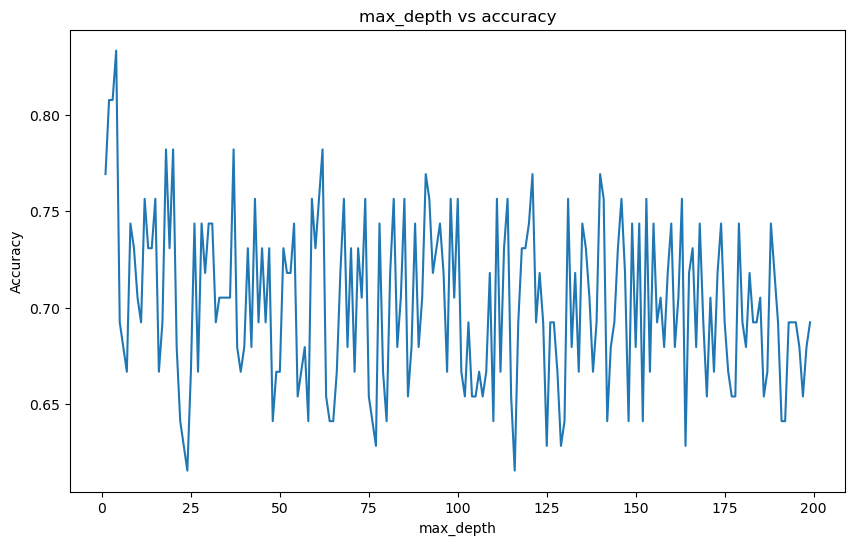

[4, 0.8333333333333334]


In [47]:
#Hyptertune max_depth
depths = range(1, 200, 1)
acc_depth = []
best_depth = [0, 0]
for i in depths:
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_train, y_train)
    model_score = model.score(X_test, y_test)
    acc_depth.append(model_score)
    if model_score > best_depth[1]:
        best_depth = [i, model_score]


#Plot the accuracy vs depth
plt.figure(figsize=(10,6))
plt.plot(depths, acc_depth)
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("max_depth vs accuracy")
plt.show()
plt.close()

#Find the largest accuracy and the depth this occurs
print(best_depth)

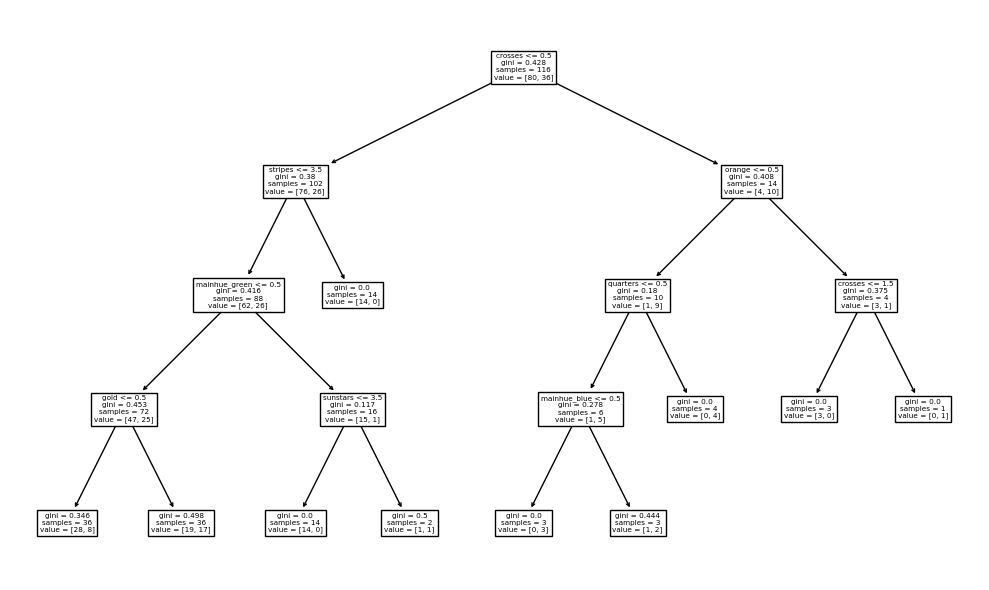

In [48]:
#Refit decision tree model with the highest accuracy and plot the decision tree
model = DecisionTreeClassifier(max_depth = best_depth[0], criterion='gini')
model.fit(X_train, y_train)

plt.figure(figsize=(10, 6))
tree.plot_tree(model, feature_names=list(X_train.columns), max_depth= best_depth[0])
plt.tight_layout()
plt.show()
plt.close()

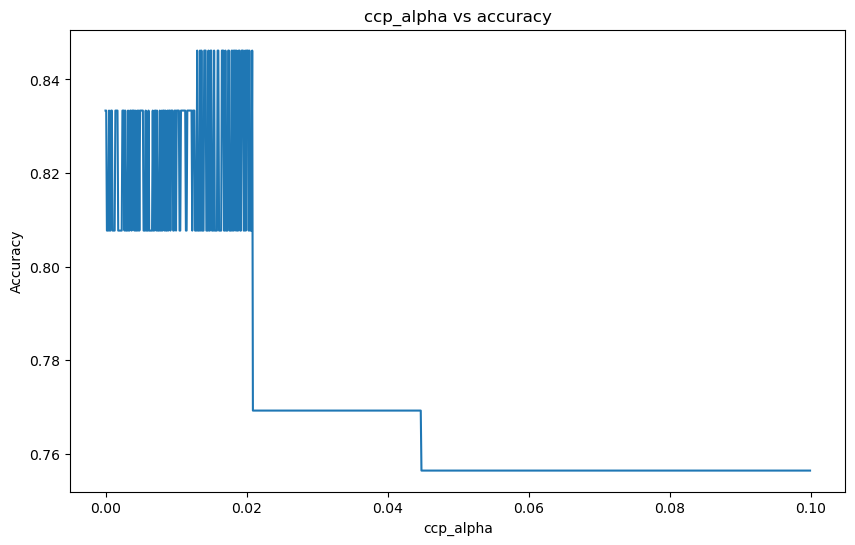

[0.013000000000000001, 0.8461538461538461]


In [49]:
#Create a new list for the accuracy values of a pruned decision tree.  Loop through
#the values of ccp and append the scores to the list
ccp = np.arange(0, 0.1, 0.0001)
acc_pruned = []
best_ccp = [0.0, 0.0]
for i in ccp:
    model = DecisionTreeClassifier(max_depth=best_depth[0], ccp_alpha = i, criterion='gini')
    model.fit(X_train, y_train)
    model_score = model.score(X_test, y_test)
    acc_pruned.append(model_score)
    if model_score > best_ccp[1]:
        best_ccp = [i, model_score]

#Plot the accuracy vs ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp, acc_pruned)
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("ccp_alpha vs accuracy")
plt.show()
plt.close()

#Find the largest accuracy and the ccp value this occurs
print(best_ccp)

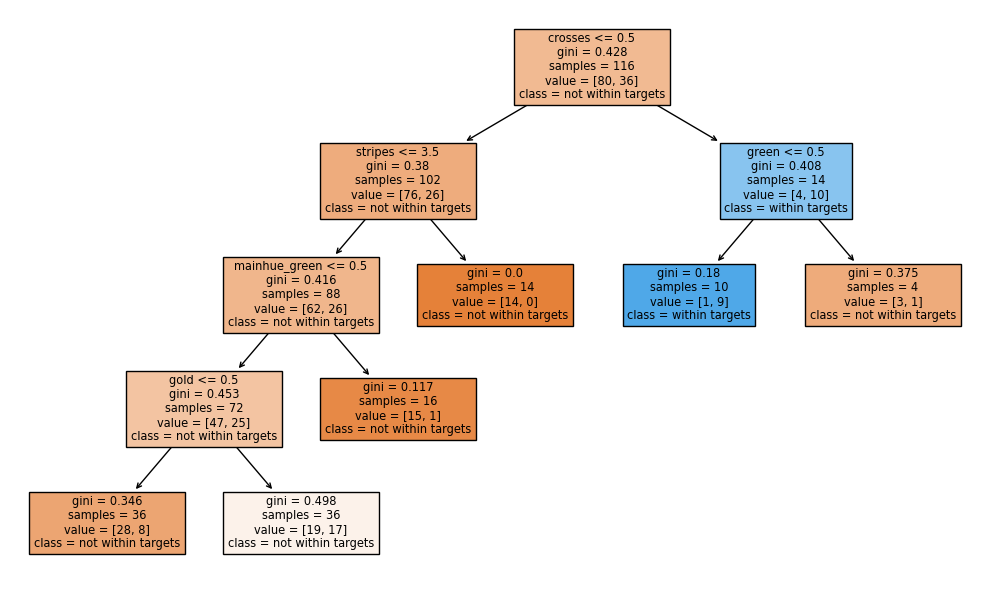

In [50]:
#Fit a decision tree model with the values for max_depth and ccp_alpha found above
model = DecisionTreeClassifier(max_depth = best_depth[0], ccp_alpha=best_ccp[0])
model.fit(X_train, y_train)


#Plot the final decision tree
plt.figure(figsize=(10,6))
tree.plot_tree(model, feature_names=list(X_train.columns), max_depth= best_depth[0], class_names=[f'not within targets', f'within targets'], label='all', filled=True)
plt.tight_layout()
plt.show()
plt.close()

In [36]:
# Flag proposed is most likely not in Europe or Oceania